<a href="https://colab.research.google.com/github/Tamizh2907/Projectcolor/blob/main/projectcolor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

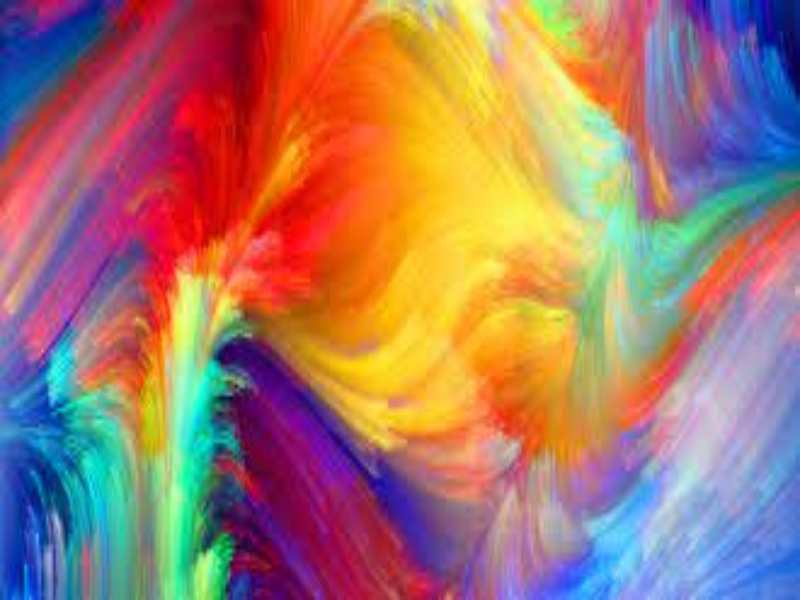

Detected Color (RGB): [ 52 183 241], Closest Color Name: Cyan, Hex Code: #34b7f1
Detected Color (RGB): [127 106 175], Closest Color Name: Purple, Hex Code: #7f6aaf
Detected Color (RGB): [ 22  70 229], Closest Color Name: Blue, Hex Code: #1646e5
Detected Color (RGB): [155 183  60], Closest Color Name: Olive, Hex Code: #9bb73c
Detected Color (RGB): [210 148 125], Closest Color Name: Pink, Hex Code: #d2947d
Detected Color (RGB): [ 75  25 140], Closest Color Name: Purple, Hex Code: #4b198c
Detected Color (RGB): [153 203 190], Closest Color Name: Pink, Hex Code: #99cbbe
Detected Color (RGB): [154  68  46], Closest Color Name: Brown, Hex Code: #9a442e


In [104]:
import cv2
import numpy as np
from scipy.spatial import distance
from google.colab.patches import cv2_imshow

# Load the input image
image = cv2.imread('/content/download.jpg')

# Preprocess the image (e.g., resize, convert to RGB)
# Example preprocessing steps: resizing and converting to RGB
image = cv2.resize(image, (800, 600))  # Resize the image
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
cv2_imshow(image)

# Reshape the image to a 2D array of pixels
pixels = image.reshape((-1, 3))

# Convert pixel values to float32
pixels = np.float32(pixels)

# Define criteria and apply K-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
num_clusters = 8
_, labels, centers = cv2.kmeans(pixels, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to uint8 and reshape back to image format
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Display the segmented image
# cv2_imshow(segmented_image)
# cv2.waitKey(0)

# Function to find the closest color name based on hexadecimal color code
def closest_color_rgb(rgb_code):
    min_distance = float('inf')
    closest_color_name = None
    for color_name, color_rgb in color_names_rgb.items():
        d = distance.euclidean(rgb_code, color_rgb)
        if d < min_distance:
            min_distance = d
            closest_color_name = color_name
    return closest_color_name

# Function to convert RGB values to hexadecimal color code
def rgb_to_hex(rgb_code):
    return '#{0:02x}{1:02x}{2:02x}'.format(rgb_code[0], rgb_code[1], rgb_code[2])

# Define a list of color names and their corresponding RGB values
color_names_rgb = {
    'Red': (255, 0, 0),
    'Green': (0, 128, 0),
    'Blue': (0, 0, 255),
    'Yellow': (255, 255, 0),
    'Cyan': (0, 255, 255),
    'Magenta': (255, 0, 255),
    'Orange': (255, 165, 0),
    'Purple': (128, 0, 128),
    'Brown': (165, 42, 42),
    'Pink': (255, 192, 203),
    'Teal': (0, 128, 128),
    'Lime': (0, 255, 0),
    'Olive': (128, 128, 0),
    'Maroon': (128, 0, 0),
    'Black': (0, 0, 0),
    'White': (255, 255, 255),
}

# Extract RGB codes of the detected colors and their corresponding color names
for center in centers:
    rgb_code = center
    closest_name = closest_color_rgb(rgb_code)
    hex_code = rgb_to_hex(rgb_code)
    print(f'Detected Color (RGB): {rgb_code}, Closest Color Name: {closest_name}, Hex Code: {hex_code}')